In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)

OSError: [WinError 193] %1 is not a valid Win32 application

In [113]:
main_df=pd.read_csv('insurance.csv')
main_df.shape

(1338, 7)

In [114]:
#As seen below there are no null objects in any column
main_df[['sex','smoker','region']] = main_df[['sex','smoker','region']].astype('str')
main_df.info()
#Datatype for the columns are mapped accordinly.
#NOTE : String datatype will be denoted as object as per python standards

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [115]:
#As seen below, there are no missing values (NA) in the dataset
print(main_df.isnull().sum())
main_df.isnull().values.any()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


False

In [116]:
# As seen below, there are no '0' values (NA) in the dataset
print(main_df[main_df['age']==0].shape)
print(main_df[main_df['bmi']==0].shape)
print(main_df[main_df['charges']==0].shape)

(0, 7)
(0, 7)
(0, 7)


In [117]:
main_df.describe()
#As seen below, there are four continuous attributes in the dataset
# 25% of people fall under the age of 27
# 50% of people fall under the age of 39
# 75% of people fall under the age of 51
# The minimum and maximum age of people in the dataset is 18 and 64
# Similarly we can infer for each of the column.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


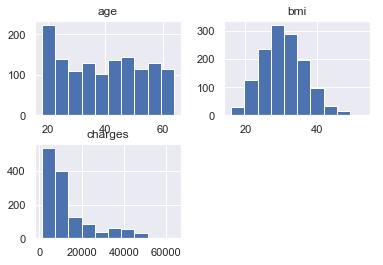

In [118]:
main_df.hist(column=['age','bmi','charges'])
plt.show()
#As seen below, looks like only BMI attribute follows as normal distribution

(0.9938876032829285, 2.609841976664029e-05)

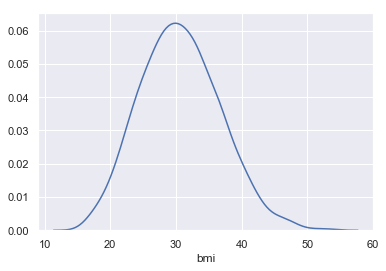

In [119]:
sns.distplot(main_df['bmi'],hist=False)
stats.shapiro(main_df['bmi'])

# As it is evident from the p-value(second value), p<0.05 BMI doesnot follow normal distribution

(0.9446991682052612, 5.687479624670986e-22)

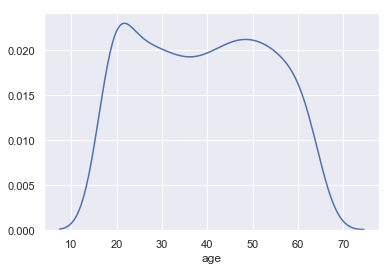

In [120]:
# In this case, the mean is not equal to the mode, which is against the normal distribution
sns.distplot(main_df['age'],hist=False)
stats.shapiro(main_df['age'])

# As it is evident from the p-value(second value), p<0.05 AGE doesnot follow normal distribution

(0.814687967300415, 1.150477698013898e-36)

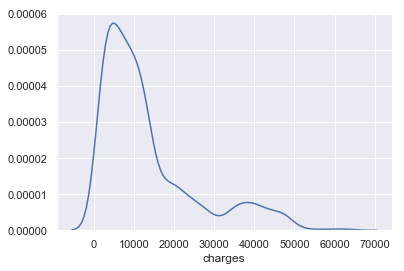

In [121]:
#In this case, the distribution is skewed on the right
sns.distplot(main_df['charges'],hist=False)
stats.shapiro(main_df['charges'])
# As it is evident from the p-value(second value), p<0.05 Charges doesnot follow normal distribution

In [122]:
# As seen in the output, skewness of BMI is greater than 0 and can be noted as Right Skewed
stats.skew(main_df['bmi'])

0.28372857291709386

In [123]:
# As seen in the output, skewness of AGE is slightly greater than 0 and can be noted as Right Skewed
stats.skew(main_df['age'])

0.055610083072599126

In [124]:
# As seen in the output, skewness of CHARGES is greater than 0 and can be noted as Right Skewed
stats.skew(main_df['charges'])

1.5141797118745743

In [125]:
main_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

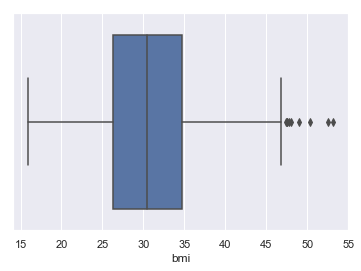

In [126]:
sns.boxplot(main_df['bmi'])

#As seen from the chart, there are some outliers for BMI

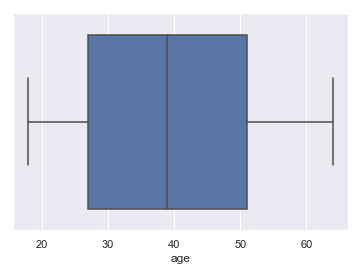

In [127]:
sns.boxplot(main_df['age'])

#As seen from the chart, there are no outliers for Age

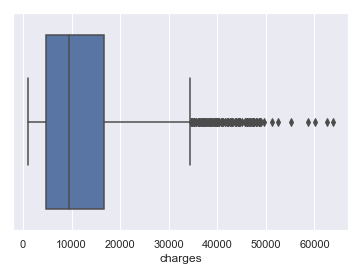

In [128]:
sns.boxplot(main_df['charges'])

#As seen from the chart, there are some outliers for Charges

In [129]:
def removeOutliers(column,df):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    df=df[df[column]<(q3+(1.5*iqr))]
    df=df[df[column]>(q1-(1.5*iqr))]
    return df

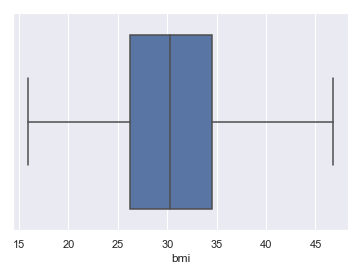

In [130]:
main_df=removeOutliers('bmi',main_df)
sns.boxplot(main_df['bmi'])

# As seen from the chart, outliers have been removed

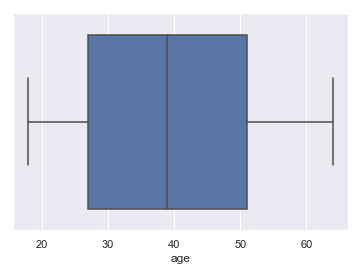

In [131]:
main_df=removeOutliers('age',main_df)
sns.boxplot(main_df['age'])

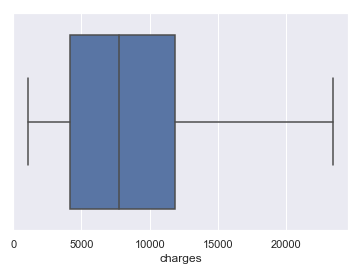

In [132]:
main_df=removeOutliers('charges',main_df)
main_df=removeOutliers('charges',main_df)
main_df=removeOutliers('charges',main_df)
main_df=removeOutliers('charges',main_df)
main_df=removeOutliers('charges',main_df)
sns.boxplot(main_df['charges'])

# As seen from the chart, outliers have been removed

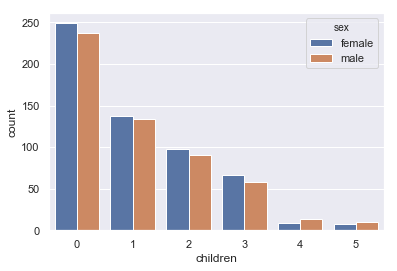

In [133]:
# Distribution of categorical attributes
sns.countplot(x='children',data=main_df,hue='sex')

#Below chart shows the male and female counts with number of chilren

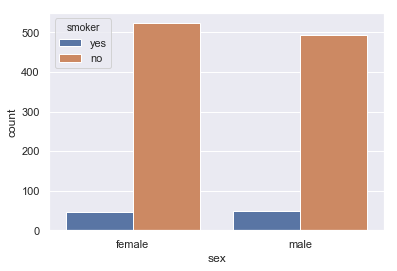

In [134]:
sns.countplot(x='sex',data=main_df,hue='smoker')

#Below chart shows the male and female counts of smoker and non-smoker

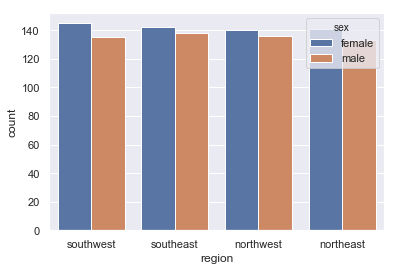

In [135]:
sns.countplot(x='region',data=main_df,hue='sex')

#Below chart shows the male and female counts in the regions

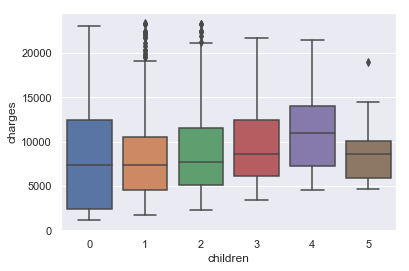

In [136]:
sns.boxplot(x='children',y='charges',data=main_df)

#Below chart shows the five point summary of charges with number of chilren

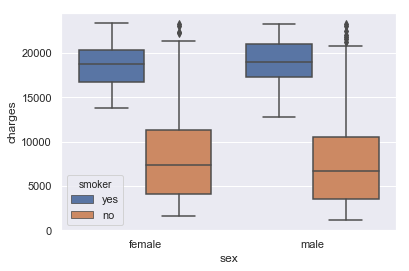

In [137]:
sns.boxplot(x='sex',y='charges',hue='smoker',data=main_df)

#Below chart shows the relation between charges and smokers or non-smokers between male and female

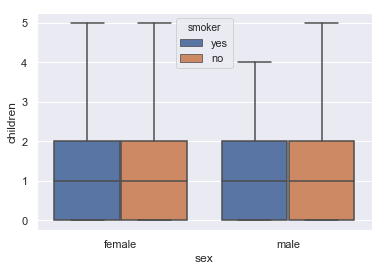

In [138]:
sns.boxplot(x='sex',y='children',hue='smoker',data=main_df)

#Below chart shows the children counts for male and female

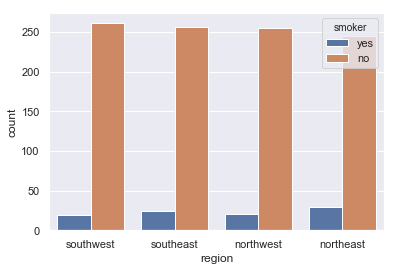

In [139]:
sns.countplot(x='region',data=main_df,hue='smoker')

#Below chart shows the smoker and non-smoker counts for people in different regions

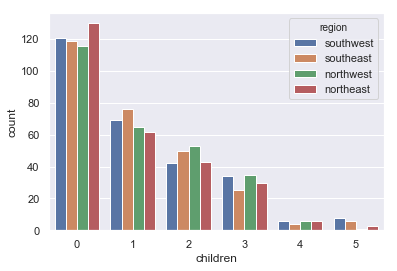

In [140]:
sns.countplot(x='children',data=main_df,hue='region')

#Below chart shows the children counts in different regions

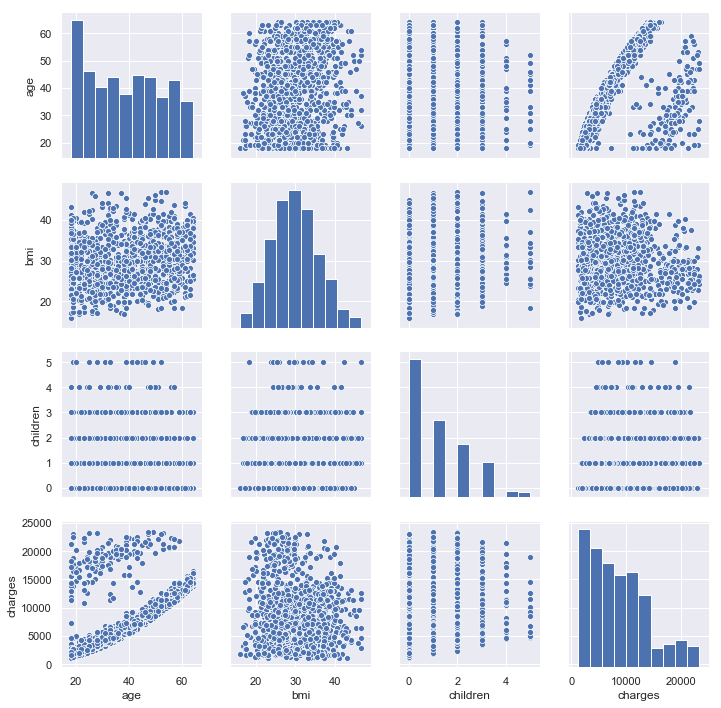

In [141]:
sns.pairplot(main_df)

In [142]:
#Do charges of people who smoke differ significantly from the people who don't?

#Let's assume that the distribution of charges follows a normal distribution
#NULL HYPOTHESIS : Charges does not differ between smokers and non-smokers H0:M1=M2
#ALTERNATE HYPOTHESIS : Charges differ between smokers and non-smokers Ha:M1!=M2
#Significance value : 0.05 (95%)

# Create a new dataframe with the required columns
smokers_df=main_df[['smoker','charges']]
smokers_df['smoker']=smokers_df[smokers_df['smoker']=='yes']
smokers_df=smokers_df.dropna()

nonSmokers_df=main_df[['smoker','charges']]
nonSmokers_df['smoker']=nonSmokers_df[nonSmokers_df['smoker']=='no']
nonSmokers_df=nonSmokers_df.dropna()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
smoker_mean=smokers_df['charges'].mean()
nonSmoker_mean=nonSmokers_df['charges'].mean()
nonSmokers_N=nonSmokers_df['charges'].shape[0]

smoker_std=smokers_df['charges'].std()
nonSmoker_std=nonSmokers_df['charges'].std()
smokers_N=smokers_df['charges'].shape[0]

std_err=np.sqrt(((smoker_std**2)/smokers_N) + ((nonSmoker_std**2)/nonSmokers_N))

t = (smoker_mean-nonSmoker_mean)/std_err
degreeOfFreedom =  (((smoker_std**2/smokers_N)+(nonSmoker_std**2/nonSmokers_N))**2)/((((smoker_std**2/smokers_N)**2)/smokers_N-1)+(((nonSmoker_std**2/nonSmokers_N)**2)/nonSmokers_N-1))
p = (1-stats.t.cdf(t,degreeOfFreedom))*2
t,p

# Here p-value is 0.0 because p-value is very small that cannot be shown by python precision

(37.491954456456675, 0.0)

In [144]:
stats.ttest_ind(smokers_df['charges'],nonSmokers_df['charges'],equal_var=False)

# As seen from the above and below results, the p-value<<0.05, so we reject the null hypotheses that states that smokers and non-smokers have same charges.
# Thus we can conclude that smokers and non-smokers have different charges

Ttest_indResult(statistic=37.49195445645663, pvalue=6.934626661630144e-80)

In [145]:
#Does bmi of males differ significantly from that of females?


#Let's assume that the distribution of BMI follows a normal distribution
#NULL HYPOTHESIS : BMI does not differ between male and female H0:M1=M2
#ALTERNATE HYPOTHESIS : Charges differ between male and female Ha:M1!=M2
#Significance value : 0.05 (95%)

# Create a new dataframe with the required columns
male_df=main_df[['sex','bmi']]
male_df['sex']=male_df[male_df['sex']=='male']
male_df=male_df.dropna()

female_df=main_df[['sex','bmi']]
female_df['sex']=female_df[female_df['sex']=='female']
female_df=female_df.dropna()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [146]:
male_mean=male_df['bmi'].mean()
female_mean=female_df['bmi'].mean()
female_N=female_df['bmi'].shape[0]

male_std=male_df['bmi'].std()
female_std=female_df['bmi'].std()
male_N=male_df['bmi'].shape[0]

std_err=np.sqrt(((male_std**2)/male_N) + ((female_std**2)/female_N))

maleFemale_t = (male_mean-female_mean)/std_err
maleFemale_degreeOfFreedom =  male_N+female_N-2

p = (1-stats.t.cdf(maleFemale_t,maleFemale_degreeOfFreedom))*2
maleFemale_t,p

(0.4879067611041654, 0.6257124156152418)

In [147]:
stats.ttest_ind(male_df['bmi'],female_df['bmi'],equal_var=True)

Ttest_indResult(statistic=0.4879084669149043, pvalue=0.6257112076927063)

In [148]:
#Since p-value 0.62>0.05, we accept the null hypothesis that states that BMI of male and female does not differ significantly.

In [149]:
#Is the proportion of smokers significantly different in different genders?

#NULL HYPOTHESIS : Proportion of smokers does not differ between male and female H0:M1=M2
#ALTERNATE HYPOTHESIS : Proportion of smokers differ between male and female Ha:M1!=M2
#Significance value : 0.05 (95%)

crosstab_observed=pd.crosstab(main_df.sex,main_df.smoker,margins=True)
crosstab_observed

smoker,no,yes,All
sex,,,
female,523,45,568
male,494,48,542
All,1017,93,1110


In [150]:
def expectedValue(param1,param2,crosstab):
    crosstab.loc[param1,param2]=(crosstab_expected.loc[param1,'All']*crosstab_expected.loc['All',param2])/crosstab_expected.loc['All','All']
    return crosstab

In [151]:
crosstab_expected = crosstab_observed.copy()
crosstab_expected=expectedValue('female','no',crosstab_expected)
crosstab_expected=expectedValue('female','yes',crosstab_expected)
crosstab_expected=expectedValue('male','no',crosstab_expected)
crosstab_expected=expectedValue('male','yes',crosstab_expected)
crosstab_expected

smoker,no,yes,All
sex,,,
female,520.410811,47.589189,568
male,496.589189,45.410811,542
All,1017.000000,93.000000,1110


In [152]:
female_nonSmokerDiffSquare=((crosstab_observed.loc['female','no']-crosstab_expected.loc['female','no'])**2)/crosstab_expected.loc['female','no']
male_nonSmokerDiffSquare=((crosstab_observed.loc['male','no']-crosstab_expected.loc['male','no'])**2)/crosstab_expected.loc['male','no']
female_smokerDiffSquare=((crosstab_observed.loc['female','yes']-crosstab_expected.loc['female','yes'])**2)/crosstab_expected.loc['female','yes']
male_smokerDiffSquare=((crosstab_observed.loc['male','yes']-crosstab_expected.loc['male','yes'])**2)/crosstab_expected.loc['male','yes']

chiSquareValue=female_nonSmokerDiffSquare+male_nonSmokerDiffSquare+female_smokerDiffSquare+male_smokerDiffSquare
degreeOfFreedom=((crosstab_observed.shape[0]-1)-1)*((crosstab_observed.shape[1]-1)-1)
p=(1-stats.t.cdf(chiSquareValue,degreeOfFreedom))*2
chiSquareValue,p

(0.3148799317780927, 0.8057981255954056)

In [153]:
stats.chi2_contingency(crosstab_observed)

(0.3148799317780927,
 0.9888334879602436,
 4,
 array([[ 520.41081081,   47.58918919,  568.        ],
        [ 496.58918919,   45.41081081,  542.        ],
        [1017.        ,   93.        , 1110.        ]]))

In [154]:
#Since p-value 0.80>0.05, we accept the null hypothesis that states that the proportion of smokers between male and female does not differ significantly.

In [155]:
#Is the distribution of bmi across women with no children, one child and two children the same

#Null Hypothesis : No Difference of BMI with number of children
#Alternate Hypothesis : There is some Difference of BMI with number of children
# Significane : 95%

no_Child=main_df[main_df['children']==0].bmi
one_Child=main_df[main_df['children']==1].bmi
two_Children=main_df[main_df['children']==2].bmi
f,p=stats.f_oneway(no_Child,one_Child,two_Children)
f,p

(0.1117751789188709, 0.8942571260448227)

In [156]:
#Since p-value 0.89>>0.05, we accept the null hypothesis and can conclude that BMI is same for women with no children, one child and two children